# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [14]:
## CHANGE THE SIZE FROM 20 TO 1500

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [ ]:
# ## USE ONLY  TO TEST
# cities = ['Paris','London','Oslo','Beijing']
# print(sorted(cities))

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


In [ ]:
# #  TEST URL

# xyz = f"{url}appid={weather_api_key}&q={'London'}&units=metric"

# xyz = requests.get(xyz)
# pprint(xyz)
# xyz = xyz.json()

In [ ]:
# ## TEST retrive infos
# print(f'city name is {xyz['name']}')
# print(f'weather is {xyz['weather'][0]['description']}')
# print(f'latitude is {xyz['coord']['lat']}')
# print(f'Longitude is {xyz['coord']['lon']}')
# print(f'Max Temp is {xyz['main']['temp_max']}')
# print(f'Humidity is {xyz['main']['humidity']}')
# print(f'Cloudiness is {xyz['clouds']['all']}')
# print(f'Wind Speed is {xyz['wind']['speed']}')
# print(f'Country is {xyz['sys']['country']}')
# print(f'Date is {xyz['dt']}')

In [9]:
### TESTS

# city_x = ['adamstown', 'albany', 'as sulayyil', 'college']
# z_list = []
# city_url = f"{url}appid={weather_api_key}&q={city}&units=metric'"
# for city in city_x:
        
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['weather'][0]['description']
#         city_wind = city_weather['wind']['speed']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # Append the City information into city_data list
#         z_list.append({"City": city,
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})
# z_list

In [16]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric'"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | preobrazheniye
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | essaouira
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | swakopmund
Processing Record 8 of Set 1 | nicoya
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | iquitos
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | kristiansund
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | pulandian
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Se

In [17]:
len(city_data)

576

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carutapera,-1.1950,-46.0200,298.62,80,97,4.51,BR,1728098725
1,preobrazheniye,42.9019,133.9064,292.84,45,0,2.82,RU,1728098726
2,kailua-kona,19.6406,-155.9956,301.13,62,40,5.14,US,1728098727
3,margaret river,-33.9500,115.0667,289.50,68,95,3.86,AU,1728098728
4,essaouira,31.5125,-9.7700,296.87,78,0,4.63,MA,1728098729


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,298.62,80,97,4.51,BR,1728098725
1,preobrazheniye,42.9019,133.9064,292.84,45,0,2.82,RU,1728098726
2,kailua-kona,19.6406,-155.9956,301.13,62,40,5.14,US,1728098727
3,margaret river,-33.9500,115.0667,289.50,68,95,3.86,AU,1728098728
4,essaouira,31.5125,-9.7700,296.87,78,0,4.63,MA,1728098729


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

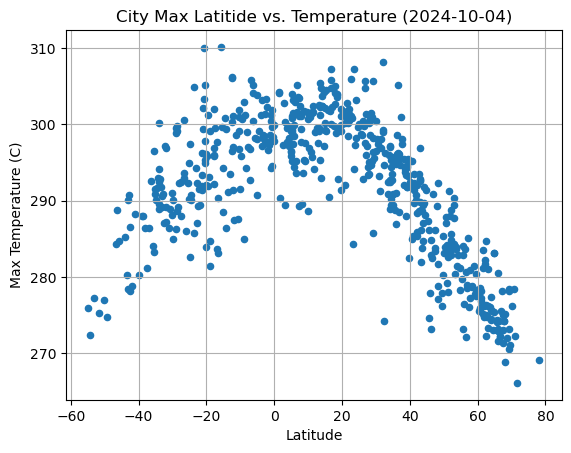

In [22]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp')


#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitide vs. Temperature ({Today})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

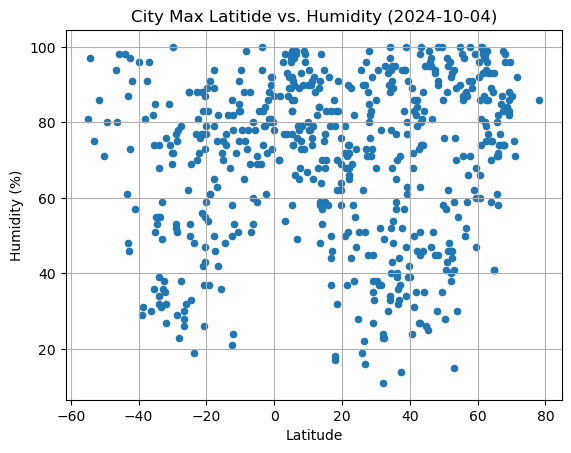

In [23]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot.scatter('Lat','Humidity')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Max Latitide vs. Humidity ({Today})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

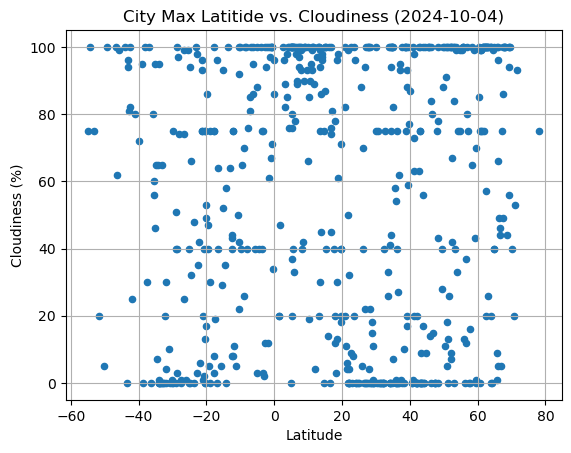

In [24]:
city_data_df.plot.scatter('Lat','Cloudiness')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitide vs. Cloudiness ({Today})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

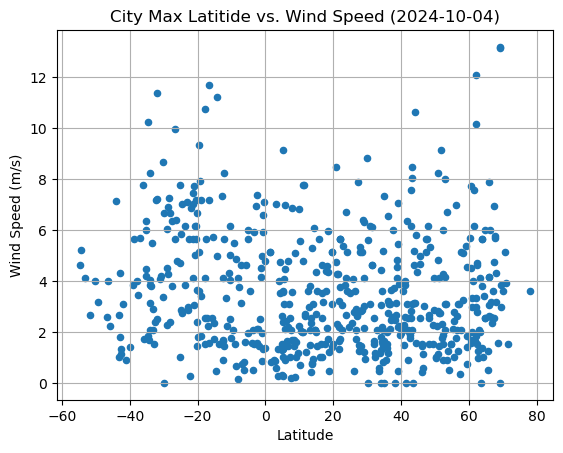

In [25]:
city_data_df.plot.scatter('Lat','Wind Speed')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitide vs. Wind Speed ({Today})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots

def regression_plot(dataframe, col1, col2):

    x_axis = dataframe[col1]
    y_axis = dataframe[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    
    ## conditional title

    if min(dataframe['Lat'])>=0 :
        plt.title(f'{col1} vs. {col2} for Northern Hemisphere')
    else : plt.title(f'{col1} vs. {col2} for Southern Hemisphere')

    ## Conditional Annotation position
    
    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    plt.show()

In [109]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,preobrazheniye,42.9019,133.9064,292.84,45,0,2.82,RU,1728098726
2,kailua-kona,19.6406,-155.9956,301.13,62,40,5.14,US,1728098727
4,essaouira,31.5125,-9.7700,296.87,78,0,4.63,MA,1728098729
5,iskateley,67.6803,53.1512,274.17,74,100,5.69,RU,1728098730
7,nicoya,10.1483,-85.4520,296.91,94,19,0.69,CR,1728098732


In [110]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,298.62,80,97,4.51,BR,1728098725
3,margaret river,-33.9500,115.0667,289.50,68,95,3.86,AU,1728098728
6,swakopmund,-22.6833,14.5333,287.03,88,3,2.88,NaN,1728098731
8,port-aux-francais,-49.3500,70.2167,274.78,80,100,3.16,TF,1728098733
9,iquitos,-3.7481,-73.2472,297.17,94,75,0.51,PE,1728098734


###  Temperature vs. Latitude Linear Regression Plot

 The r^value is : -0.867


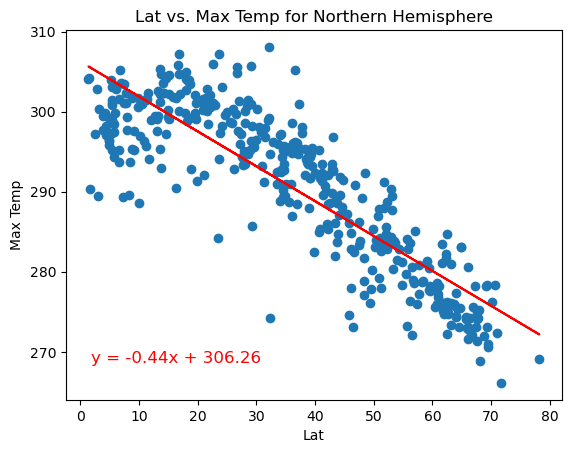

In [111]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df,'Lat','Max Temp')

 The r^value is : 0.682


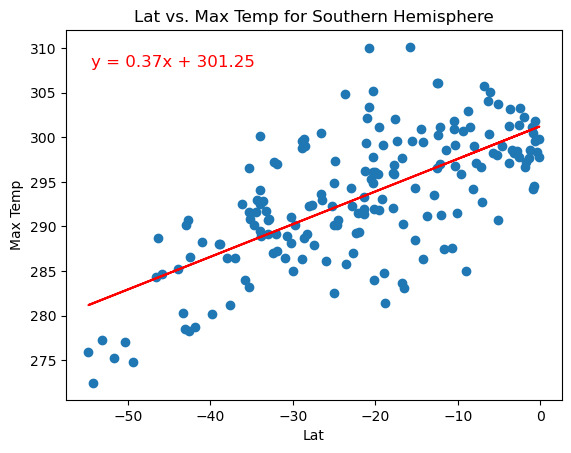

In [112]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
regression_plot(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 The r^value is : 0.031


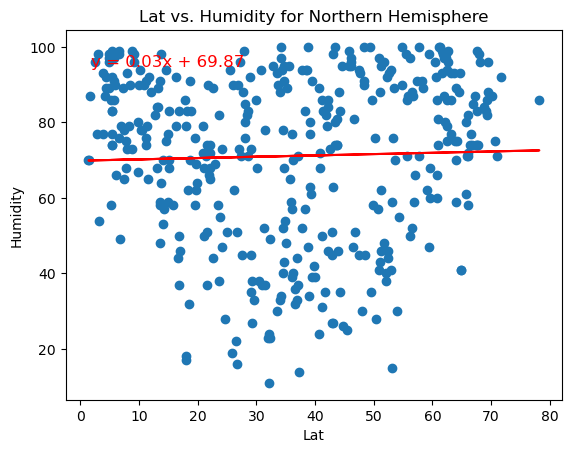

In [113]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Lat','Humidity')

 The r^value is : 0.167


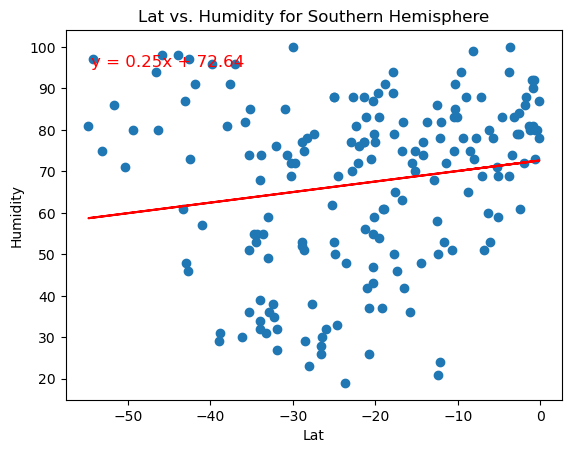

In [114]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The r^value is : -0.03


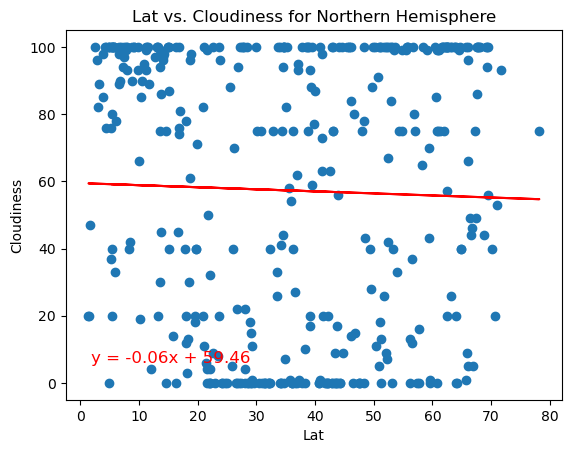

In [115]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Lat','Cloudiness')

 The r^value is : 0.128


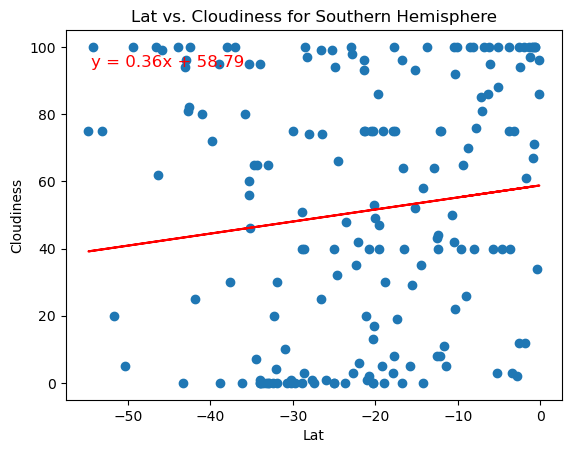

In [116]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The r^value is : 0.129


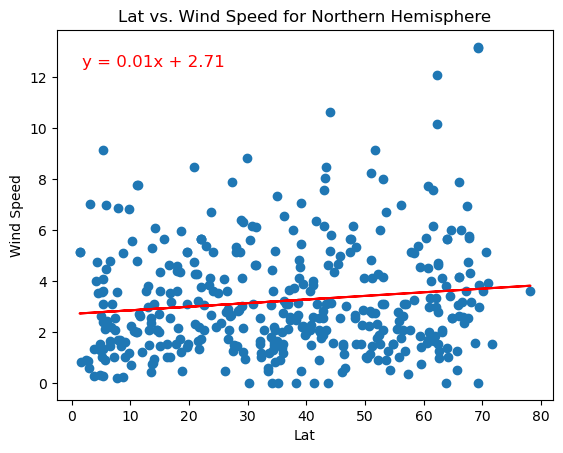

In [117]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Lat','Wind Speed')

 The r^value is : -0.085


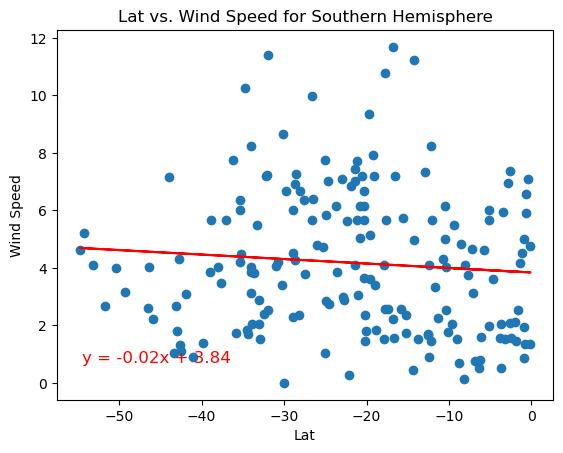

In [118]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE